# Build a Model Fast (Introduction to Scikit- Learn)

Scikit-learn is known for a diverse library of different model implementations ranging from linear regression to neural networks, and handling different kinds of modeling problems such as regression, classification, and clustering. 
- Scikit-learn is for building and training a machine learning model
- Scikit-learn is a library dedicated to machine learning and statistical modeling.

Linear Regression in Scikit- Learn
- Goal: Build a linear model predicting abalone rings using scikit-learn.
    - Training data: Abalone data set
    - Input / Features: All abalone columns except rings
    - Output / Target: Predicted rings column
    - Model Type: Ordinary least squares linear regression

Code Example: Linear Regression in Scikit-Learn

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.linear_model

In [3]:
abalone = pd.read_csv("https://raw.githubusercontent.com/bu-cds-omds/dx602-examples/main/data/abalone.tsv", sep="\t")

- Now the abalone variable has all the abalone data.
- Both the input features and output target are in that data frame, so let's separate them.

In [4]:
# select just the rings column for the target
abalone_target = abalone["Rings"]

- The target is just that one column.
- The input features will be everything but rings and sex.

In [5]:
# drop target variable, and string features
abalone_features = abalone.drop(["Rings", "Sex"], axis=1)

- Rings will be removed because that is the target, and sex is removed because that column is a string while linear regression only works with numbers.

In [6]:
sklearn.linear_model.LinearRegression

sklearn.linear_model._base.LinearRegression

In [7]:
linear_model = sklearn.linear_model.LinearRegression()
linear_model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


- Since we are not using any options or arguments, we can create the model just by referring to the full class name and adding parenthesis like a function call.
- And there is indeed a function call; the init function of the class will be called.
- But there will be a little object setup magic where the object is created, the init function is called with a reference to that object, and then the reference is returned back.
- So now we have a model, but it is not trained or fitted.
- That is, the model has no relationship to the abalone data yet.
- I would show you how bad the prediction was, but scikit-learn has a safeguard to avoid predictions on untrained models.
- To make the model predict based on the abalone data, we call the model's fit method with the abalone features and target data.

In [8]:
linear_model.fit(abalone_features, abalone_target)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


- Let's look how well it fits the training data.

In [9]:
# compute R^2 score to check model quality
linear_model.score(abalone_features, abalone_target)

0.5276299399919837

- A brief description is that this R squared score measures how much variation in the data set is explained by the model.
- A score of one is a perfect model.
- A score of zero explains nothing.
- A negative score means something went terribly wrong.
- So this linear model explains about half the variation in the training data

In [10]:
# make predictions with this model
linear_predictions = linear_model.predict(abalone_features)
linear_predictions

array([ 8.77893882,  7.23758471, 10.84589582, ..., 10.88079477,
        9.6174032 , 11.04119896], shape=(4177,))

- To make the predictions, we simply called the models predict method with the features data frame, and it returned a NumPy array of predictions.
- One thing to note immediately is that all these predictions are real numbers, not integers like the target ring counts.

In [11]:
# check range of predictions from this model
linear_predictions.min(), linear_predictions.max()

(np.float64(-2.827201709055525), np.float64(23.177700402752386))

- The predictions range from roughly -3 to 23.
- Negative predictions are bogus.
- The ring count cannot be negative.
- Even zero is suspect.
- Zero rings sounds like missing data or a counting error.

In [12]:
# check the actual range of target value
abalone_target.min(), abalone_target.max()

(np.int64(1), np.int64(29))

- The actual range in the training data is from 1 to 29 rings.
- So the negative predictions are definitely sketchy, and the prediction is always missing in cases with 24 to 29 ranges.
- Maybe the model is unable to isolate cases where the prediction should be so high?
- Let's plot the predictions and actual values and get a better look at how they compare.

Text(0, 0.5, 'Actual Rings')

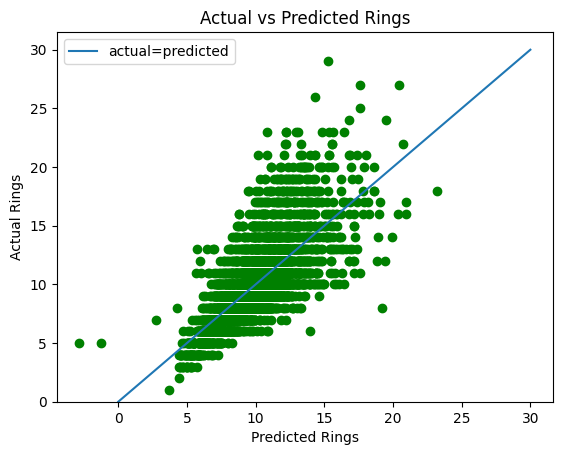

In [13]:
# plot actual target values vs predicted values

plt.plot([0, 30], [0, 30], label="actual=predicted")
plt.scatter(linear_predictions, abalone_target, color="green")

#plt.gca().set_xlim(0) # some predictions are negative
plt.gca().set_ylim(0) #This line of code makes sure the vertical axis (Y-axis) on your current chart or graph starts at zero.
#gca: get current axes- It retrieves the reference to the last axes object created or the one currently active in the figure.
#.set_ylim(0)- This is a method of the axes object that controls the y-axis limits.
plt.legend()
plt.title("Actual vs Predicted Rings")
plt.xlabel("Predicted Rings")
plt.ylabel("Actual Rings")

- The x or horizontal axis is the predicted number of rings.
- The y or vertical access is the actual number of rings.
- Each green dot shows a pair of predictions and actual values, one for each row in the training data.
- There are horizontal stripes visible between the green dots because the actual numbers of rings are integers.
- This means the actual ring numbers are clustered vertically at integers with gaps in between consecutive integers.
- There are no vertical stripes because linear regression is not limited to integer outputs.
- The blue line shows where the actual number of rings is equal to the predicted number of rings.
- The y=x line if you please.
- If the predictions were perfect and always matched the actual numbers of rings, all the green dots would fall on this line.
- That is not what we see, but we do see that they tend to be clustered loosely around that line.
- The negative predictions are not great; we could improve the model by pulling those up to 1, the minimum actual number of rings.
- But that is not a feature of linear models.

Recap of Linear Regression in Sci-kit Learn

- Three easy steps -

model = sklearn.linear_model.LinearRegression()
model.fit(...)
model.predict(...)

- Scikit-learn made this linear regression trivial to implement.
- This is the ease that makes scikit-learn so popular.
- Makes model building easy 

Introducing Scikit-Learn
- The article introduces Scikit-Learn as one of the best-known Python libraries for machine learning, noted for its efficient algorithms and a clean, uniform, and streamlined API.
- The core of the Scikit-Learn approach is based on two main concepts: Data Representation and the Estimator API.

- Data Representation in Scikit-Learn
    - Machine learning data is typically represented as tables:
        - Features Matrix(X): A two-dimensional array of shape [n_samples, n_features].
            - Samples (Rows): The individual objects or observations in the dataset (e.g., a flower, a person, an image).
            - Features (Columns): The distinct quantitative measurements that describe each sample (e.g., sepal length, pixel intensity).
        - Target Array (y): A one-dimensional array (or series) of length n_samples. This is the quantity you want to predict from the features (e.g., the species of a flower or the digit label of an image).

- Data as a table 
    - A basic table is a two-dimensional grid of data, in which the rows represent individual elements of the dataset, and the columns represent quantities related to each of these elements. 
    - Rows of the matrix as samples, and the number of rows as n_samples
    - Each column of the data refers to a particular quantitative piece of information that describes each sample. In general, we will refer to the columns of the matrix as features, and the number of columns as n_features.

In [14]:
import seaborn as sns 
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


- With this target array in mind, we can use Seaborn to conveniently visualize the data:

/home/codespace/.local/lib/python3.12/site-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


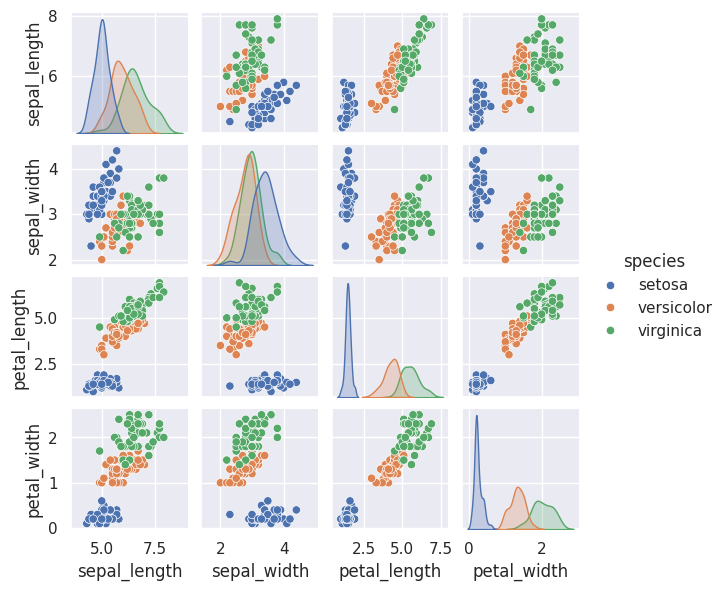

In [15]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', size=1.5);

In [16]:
X_iris = iris.drop('species', axis=1) #Separating the features (input data) from the labels in the iris dataset, and then checking the dimensions of the resulting feature data.
X_iris.shape

(150, 4)

In [17]:
#That code snippet is loading the 'species' target column from a dataset likely named iris (referencing the famous Iris flower dataset) and then checking how many entries it contains.
y_iris = iris['species'] 
y_iris.shape

(150,)

- The Estimator API 
    - Every machine learning algorithm in Scikit-Learn is implemented via the Estimator API, which enforces a consistent workflow regardless of the model type (classification, regression, clustering, etc.).
    - The five key steps in using the Estimator API are:
    1. Choose a class of model: Import the appropriate estimator class (e.g., LinearRegression, GaussianNB, PCA).
    2. Choose model hyperparameters: Instantiate the class, passing desired parameter values (e.g., model = LinearRegression(fit_intercept=True)).
    3. Arrange data: Ensure the data is formatted into the $\mathbf{X}$ (features matrix) and $\mathbf{y}$ (target array) structure.
    4. Fit the model: Train the model on the data using the fit() method (model.fit(X, y)). For unsupervised learning, the $\mathbf{y}$ (target) is not needed.
    5. Apply the Model:
        - For supervised learning (like classification), use predict() to forecast labels for new data.
        - For unsupervised learning (like dimensionality reduction), use transform() or predict() to infer properties or transform the data.

- Supervised Learning Example: Simple Linear Regression 

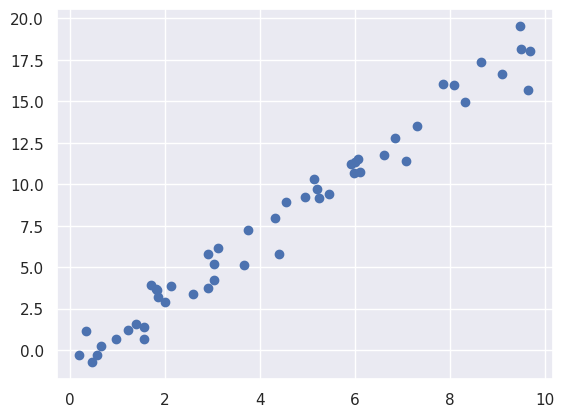

In [18]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);


- Choose a Class of Model 
    - In Scikit-Learn, every class of model is represented by a Python class

In [19]:
from sklearn.linear_model import LinearRegression

- Choose Model Hyperparameters 


In [20]:
model = LinearRegression(fit_intercept=True)
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


- Arrange Data into a Features Matrix and Target Vector 
    - Previously we detailed the Scikit-Learn data representation, which requires a two-dimensional features matrix and a one-dimensional target array. Here our target variable y is already in the correct form (a length-n_samples array), but we need to massage the data x to make it a matrix of size [n_samples, n_features]. In this case, this amounts to a simple reshaping of the one-dimensional array:

In [21]:
X = x[:, np.newaxis]
X.shape

(50, 1)

- Fit the Model to Your Data 

In [22]:
model.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
model.coef_

array([1.9776566])

In [24]:
model.intercept_

np.float64(-0.9033107255311146)

- These two parameters represent the slope and intercept of the simple linear fit to the data. 
- In general, Scikit-Learn does not provide tools to draw conclusions from internal model parameters themselves: interpreting model parameters is much more a statistical modeling question than a machine learning question. Machine learning rather focuses on what the model predicts.

- Predict Labels for Unknown Data 
    - Once the model is trained, the main task of supervised machine learning is to evaluate it based on what it says about new data that was not part of the training set. In Scikit-Learn, this can be done using the predict() method. 

In [25]:
xfit = np.linspace(-1, 11)

- As before, we need to coerce these x values into a [n_samples, n_features] features matrix, after which we can feed it to the model:

In [26]:
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

- Finally, let's visualize the results by plotting first the raw data, and then this model fit:

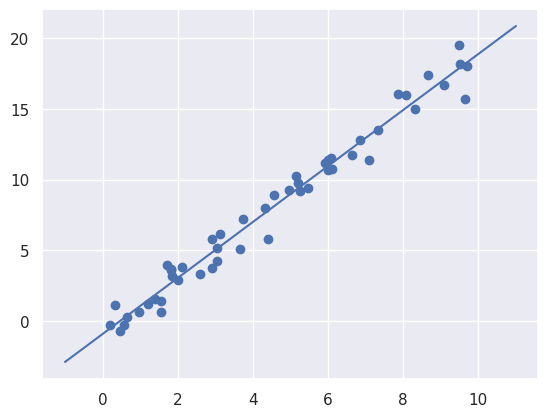

In [27]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

The rest of the examples on Scikit-Learn can be found here: https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html 

In Depth: Linear Regression 

- This chapter section from the Python Data Science Handbook by Jake VanderPlas provides an in-depth look at Linear Regression, demonstrating its use for modeling relationships in data and extending it to handle more complex, non-linear patterns using Scikit-Learn.

1. Simple Linear RegressionThe simplest form of linear regression fits a straight line to data using the equation $y = ax + b$, where $a$ is the slope and $b$ is the intercept. Scikit-Learn's LinearRegression estimator can be used to fit this model to data and is very efficient and interpretable.
2. Multidimensional Linear ModelsThe same LinearRegression estimator can handle multidimensional linear models of the form $y = a_0 + a_1x_1 + a_2x_2 + \cdots$. Geometrically, this involves fitting a plane (or hyperplane in higher dimensions) to the data points.
3. Basis Function RegressionTo model non-linear relationships with a linear model, the data is transformed using basis functions. The key idea is to project the single-dimensional input ($x$) into a higher dimension by building new features (e.g., $x_1, x_2, x_3$) from $x$. The model remains "linear" because the coefficients ($a_n$) are not multiplied or divided by each other. -  
    - Polynomial Basis Functions: Uses powers of the input, e.g., $x, x^2, x^3$. This is implemented using Scikit-Learn's PolynomialFeatures transformer, often combined with LinearRegression in a Pipeline.Gaussian Basis Functions: Fits a model that is a sum of -  
    - Gaussian curves, providing another way to model complex non-linear patterns.
4. RegularizationIntroducing basis functions can easily lead to overfitting (where the model fits the training data noise too closely). Regularization is a technique used to constrain model flexibility by penalizing large values of the model parameters (coefficients).
    - Ridge Regression (L2 Regularization): Penalizes the sum of squares of the model coefficients. The Ridge estimator in Scikit-Learn uses a parameter $\alpha$ to control the strength of this penalty. It is computationally efficient.
    - Lasso Regression (L1 Regularization): Penalizes the sum of absolute values of the coefficients. A key feature of Lasso is that it tends to favor sparse models by preferentially setting some model coefficients to exactly zero, effectively selecting a subset of the most important features.
5. Application Example: Predicting Bicycle Traffic
- The section concludes with a practical example using a linear regression model to predict the number of bicycle trips across Seattle's Fremont Bridge based on features like:
    - Day of the week
    - Holiday status
    - Hours of daylight
    - Precipitation
    - Temperature
    - Annual trend 
- By examining the model's coefficients and their uncertainty (calculated via bootstrap resampling), one can interpret the quantitative impact of each factor, such as:
    - An increase in daylight, temperature, or a dry day strongly encourages riding.
    - Weekdays have significantly more riders than weekends or holidays.
    - An inch of precipitation strongly discourages riding.

Examples on Linear Regression can be found here: https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html

Regression in Scikit- Learn